# Introduction to Forecasting
<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/forecast.png" width="800">


## Forecasting Problem
For this example we'll use airline_passengers dataset, and we'll split the data into 108 training records and 36 testing records. Then we'll evaluate the performance of the model.

In [ ]:
import pandas as pd
import numpy as np

!wget https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/Data/airline_passengers.csv

--2022-12-12 18:20:45--  https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/Data/airline_passengers.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.142.106
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.142.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2049 (2.0K) [application/vnd.ms-excel]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   2.00K  --.-KB/s    in 0s      

2022-12-12 18:20:45 (79.6 MB/s) - ‘airline_passengers.csv’ saved [2049/2049]



In [ ]:
df = pd.read_csv('airline_passengers.csv')
df

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df = pd.read_csv('airline_passengers.csv',
                 index_col='Month',
                 parse_dates=True)

df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/0.jpg" width="800">

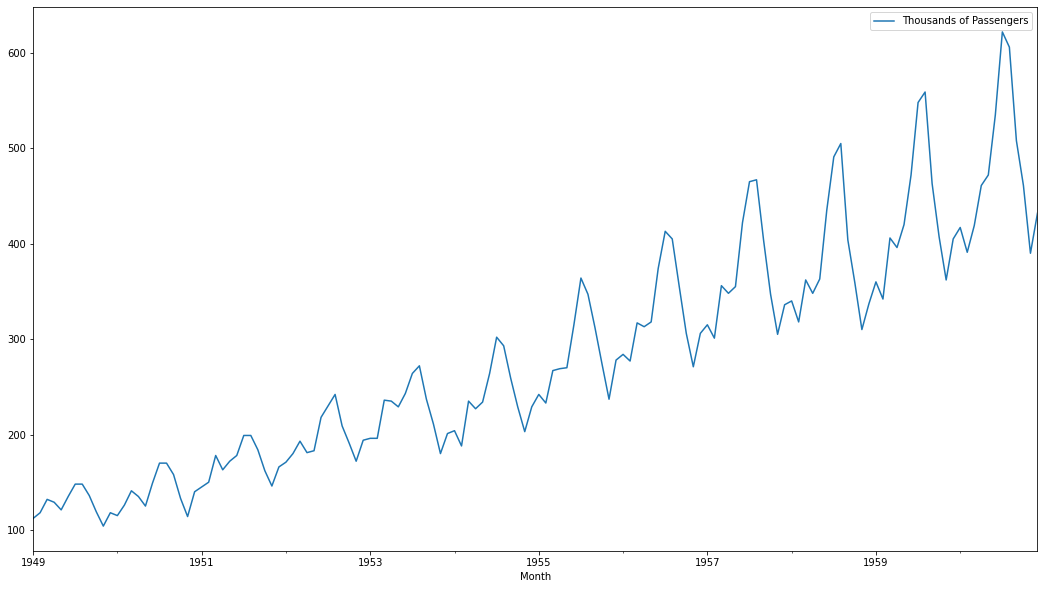

In [ ]:
df.plot(figsize=(18,10));

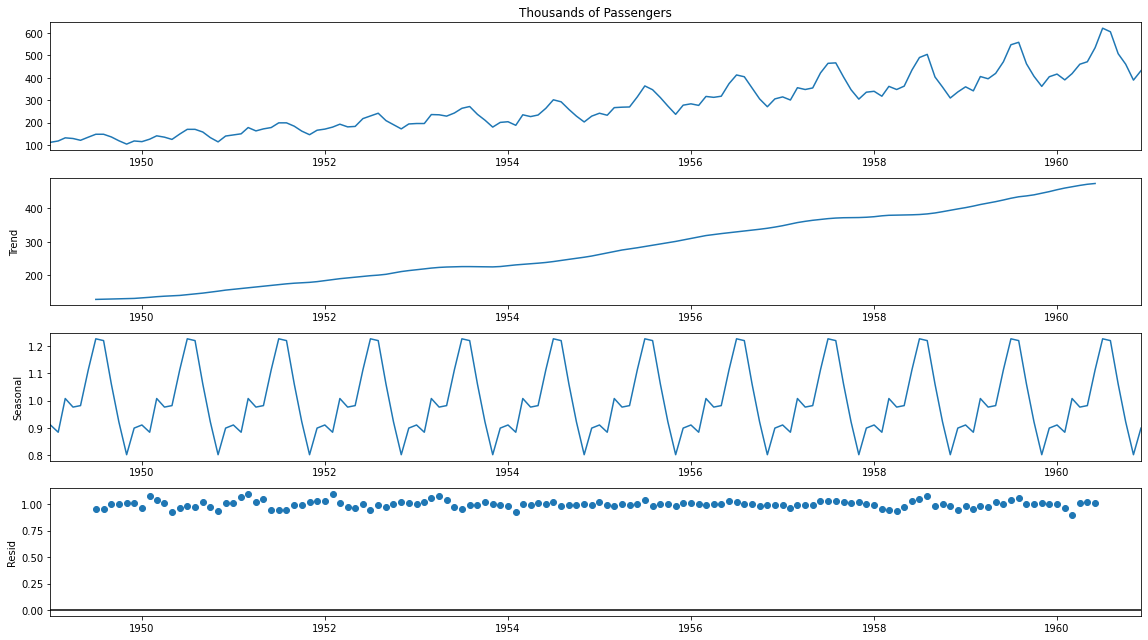

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Thousands of Passengers'],
                            model='multiplicative')  # model='mul' also works
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()

### <font color=blue>Simple Exponential Smoothing / Simple Moving Average</font>
This is the simplest to forecast. $\hat{y}$ is equal to the most recent value in the dataset, and the forecast plot is simply a horizontal line extending from the most recent value.
### <font color=blue>Double Exponential Smoothing / Holt's Method</font>
This model takes trend into account. Here the forecast plot is still a straight line extending from the most recent value, but it has slope.
### <font color=blue>Triple Exponential Smoothing / Holt-Winters Method</font>
This model has (so far) the "best" looking forecast plot, as it takes seasonality into account. When we expect regular fluctuations in the future, this model attempts to map the seasonal behavior.

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/ts.jpg" width="1000">




## Train Test Split

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/b.png" width="1000">

In [ ]:
len(df)-36

108

In [ ]:
train_data = df.iloc[:109] # Goes up to but not including 109
test_data = df.iloc[108:]

In [ ]:
len(test_data)

36

# Components of Time Series and Time Series Properties
## Time Series Decomposition
In general, most time series can be decomposed in three major components: `trend`, `seasonality`, and `noise`.

**`trend`** shows whether the series is consistently decreasing (downward trend), constant (no trend) or increasing (upward trend) over time.

**`seasonality`** describes the periodic signal in your time series.

**`noise`** or **`residual`** displays the unexplained variance and volatility of the time series.

We can easily access those components applying Python’s statsmodels library [seasonal_decompose]( https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html).

## Time Series Properties
Time series components help us recognizing some of important properties such as `seasonality`, ` cyclicality `, `stationarity`, and whether the time series is `additive` or `multiplicative`.  Throughout this tutorial, you will learn how recognizing and understanding such properties is essential in the process of building a successful forecasting model.

### Seasonality x Cyclicality

By observing the seasonal component, we can say if the time series is `seasonal` or `cyclic`. `Seasonality` should always present a fixed and known period. If there is no fixed or known period, we are observing a cyclic signal, i.e., ` cyclicality`.

### Stationarity

A time series is `stationary` if its statistical properties do not change over time.

Many algorithms such as SARIMAX models are built on this concept. For those algorithms it is important to identify this property. This happens because when running linear regression, the assumption is that all of the observations are independent of each other. In a time series, however, we know that observations are time dependent. So, by making the time series stationary we are able to apply regression techniques to time dependent variables. In other words, the data becomes easier to analyse over long periods of time as it won’t necessarily keep varying and so, the algorithms can assume that stationary data and make better predictions.

If the time series is non-stationary there are ways to make it stationary.

A stationary time series fulfills the following criteria:

1.	**Trend zero**.
2.	**The variance in the seasonality component is constant**: The amplitude of the signal does not change much over time.
3.	**Autocorrelation is constant**: The relationship of each value of the time series and its neighbors stays the same.


### Additive x Multiplicative Model

As seen previously a time series is a combination of its components: trend, seasonal, and residual components. This combination can occur either in an additive or multiplicative way.

**Additive Model**

In an additive model these components are added in linear way where changes over time are consistently made by the same amount.

$$Y(t) = trend + seasonality + residual$$

In the decomposition we can identify it by:

* Linear trend: trend is a straight line
* Linear seasonality: Seasonality with same frequency (width of cycles) and amplitude (height of cycles).

**Multiplicative Model**

On the other side, in a multiplicative model, components are multiplied together:

$$Y(t) = trend * seasonality * residual$$

Therefore, this model is nonlinear (e.g., quadratic or exponential) and changes increase or decrease over time.

* Non-linear trend: trend is a curved line
* Non-linear seasonality: Seasonality varies in frequency (width of cycles) and/or amplitude (height of cycles).

[One of the main objectives for a decomposition is to estimate **seasonal effects** that can be used to create and present seasonally adjusted values](https://online.stat.psu.edu/stat510/lesson/5/5.1). So to choose between additive and multiplicative decompositions we consider that:

* The additive model is useful when the seasonal variation is relatively constant over time.
* The multiplicative model is useful when the seasonal variation increases over time.

## Fitting the Model

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                    trend='mul', #multiplicative # additive
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


## Evaluating Model against Test Set

In [ ]:
# YOU CAN SAFELY IGNORE WARNINGS HERE!
# THIS WILL NOT AFFECT YOUR FORECAST, IT'S JUST SOMETHING STATSMODELS NEEDS TO UPDATE UPON NEXT RELEASE.
test_predictions = fitted_model.forecast(36)
                         #model.predict()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [ ]:
test_predictions

1958-02-01    339.143032
1958-03-01    399.281896
1958-04-01    394.233997
1958-05-01    402.545543
1958-06-01    473.128522
1958-07-01    521.795005
1958-08-01    514.512937
1958-09-01    446.216497
1958-10-01    385.430919
1958-11-01    339.645080
1958-12-01    381.455910
1959-01-01    401.210107
1959-02-01    387.159306
1959-03-01    455.812702
1959-04-01    450.050116
1959-05-01    459.538420
1959-06-01    540.114621
1959-07-01    595.671363
1959-08-01    587.358291
1959-09-01    509.392359
1959-10-01    440.000688
1959-11-01    387.732435
1959-12-01    435.462892
1960-01-01    458.013911
1960-02-01    441.973782
1960-03-01    520.347207
1960-04-01    513.768747
1960-05-01    524.600416
1960-06-01    616.584692
1960-07-01    680.007224
1960-08-01    670.517177
1960-09-01    581.512736
1960-10-01    502.296509
1960-11-01    442.628055
1960-12-01    497.116246
1961-01-01    522.860066
Freq: MS, dtype: float64

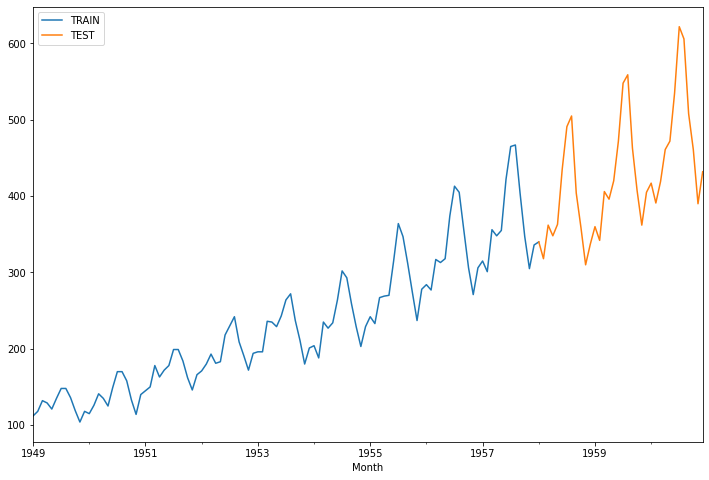

In [ ]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

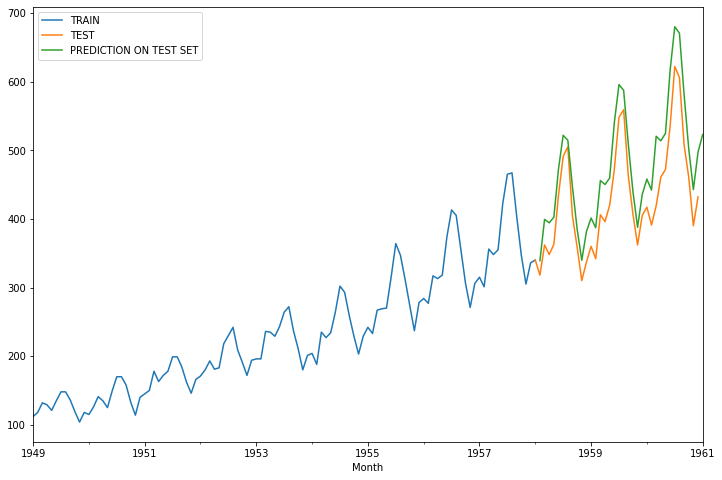

In [ ]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION ON TEST SET');

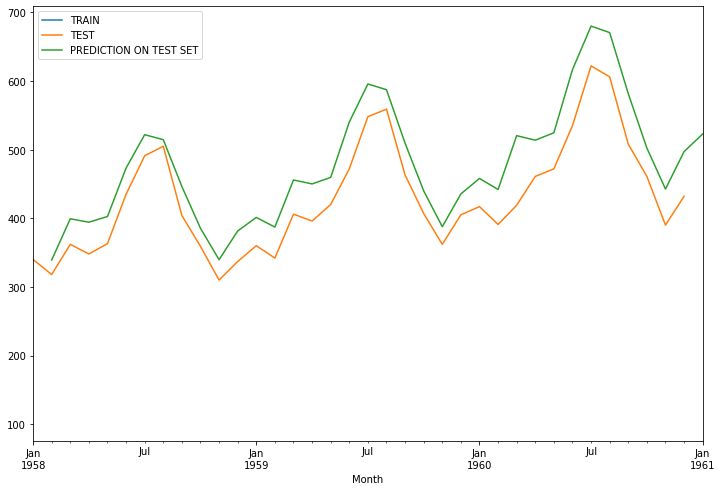

In [ ]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION ON TEST SET',
                      xlim=['1958-01-01','1961-01-01']);

## Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
#MAE
mean_absolute_error(test_data,test_predictions)

63.031188493774

In [ ]:
#MSE
mean_squared_error(test_data,test_predictions)

5614.265289857208

In [ ]:
#RSME
np.sqrt(mean_squared_error(test_data,test_predictions))

74.92840108968834

In [ ]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


## Forecasting into Future

In [ ]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],
                                   trend='mul',
                                   seasonal='add',
                                   seasonal_periods=12).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [ ]:
forecast_predictions = final_model.forecast(36) # AT LEAST AS LONG AS THE TEST SET

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


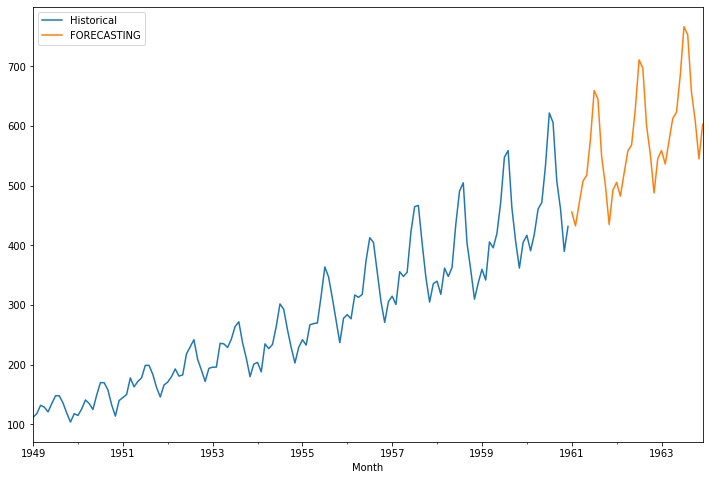

In [ ]:
df['Thousands of Passengers'].plot(figsize=(12,8),
                                   legend=True,label='Historical')
forecast_predictions.plot(legend=True,label='FORECASTING');

# Stationarity
Time series data is said to be <em>stationary</em> if it does <em>not</em> exhibit trends or seasonality. That is, the mean, variance and covariance should be the same (CONSTANT!) for any segment of the series, and are not functions of time.<br>

<div class="alert alert-info"><h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/stationarity.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Stationarity and differencing</font></div>

In [ ]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/Data/samples.csv

--2022-12-12 18:48:40--  https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/Data/samples.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.150.98
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.150.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2745 (2.7K) [application/vnd.ms-excel]
Saving to: ‘samples.csv’

samples.csv         100%[===================>]   2.68K  --.-KB/s    in 0s      

2022-12-12 18:48:40 (210 MB/s) - ‘samples.csv’ saved [2745/2745]



In [ ]:
df2 = pd.read_csv('samples.csv',index_col=0,parse_dates=True)
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


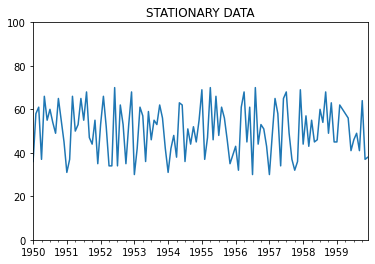

In [ ]:
# STATIONARY
df2['a'].plot(ylim=[0,100],title="STATIONARY DATA");

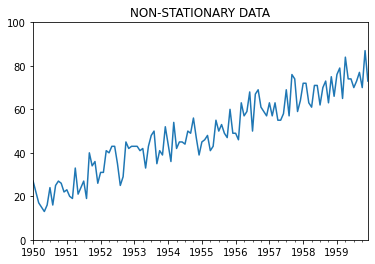

In [ ]:
# NON-STATIONARY
df2['b'].plot(ylim=[0,100],title="NON-STATIONARY DATA");

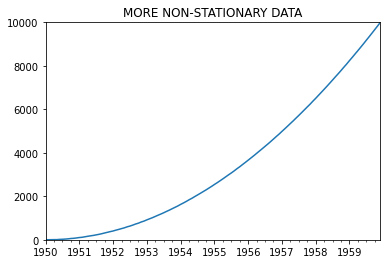

In [ ]:
# NON-STATIONARY
df2['c'].plot(ylim=[0,10000],title="MORE NON-STATIONARY DATA");

In [ ]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/Data/DailyTotalFemaleBirths.csv

--2022-12-12 18:48:52--  https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/Data/DailyTotalFemaleBirths.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.143.34
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.143.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4744 (4.6K) [application/vnd.ms-excel]
Saving to: ‘DailyTotalFemaleBirths.csv’

DailyTotalFemaleBir 100%[===================>]   4.63K  --.-KB/s    in 0s      

2022-12-12 18:48:53 (181 MB/s) - ‘DailyTotalFemaleBirths.csv’ saved [4744/4744]



In [ ]:
# Load a stationary dataset
df3 = pd.read_csv('DailyTotalFemaleBirths.csv',
                  index_col='Date',
                  parse_dates=True)
df3.index.freq = 'D'
df3

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


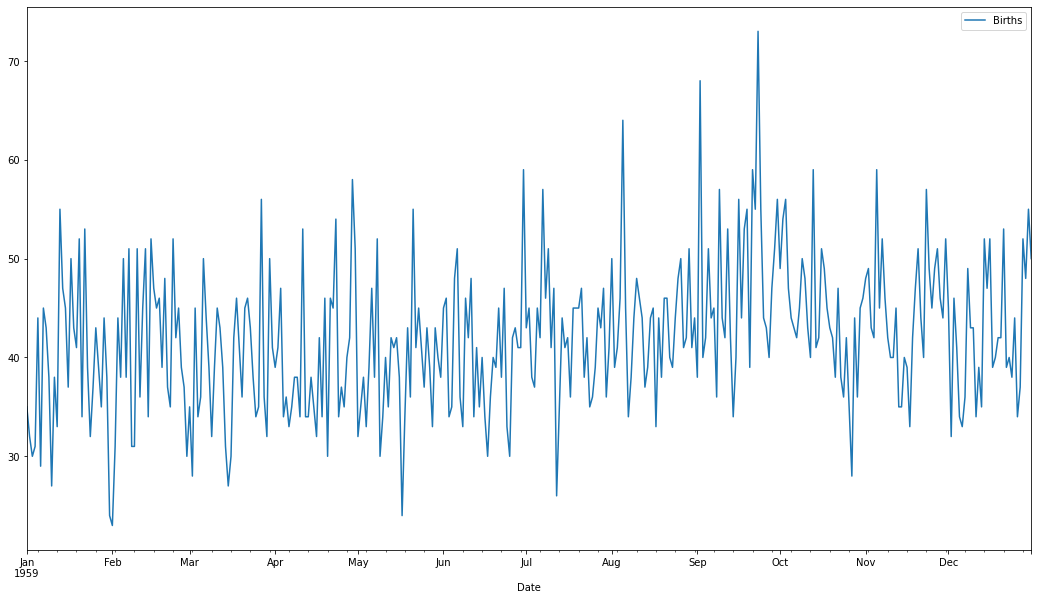

In [ ]:
df3.plot(figsize=(18,10));

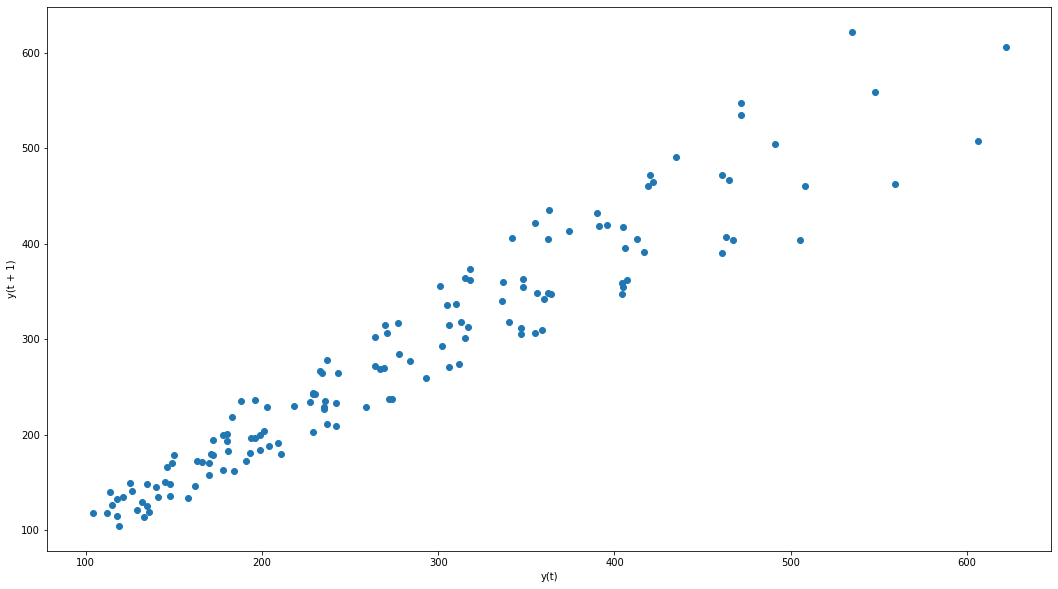

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

plt.figure(figsize=(18,10))
#High correlation
lag_plot(df['Thousands of Passengers']);

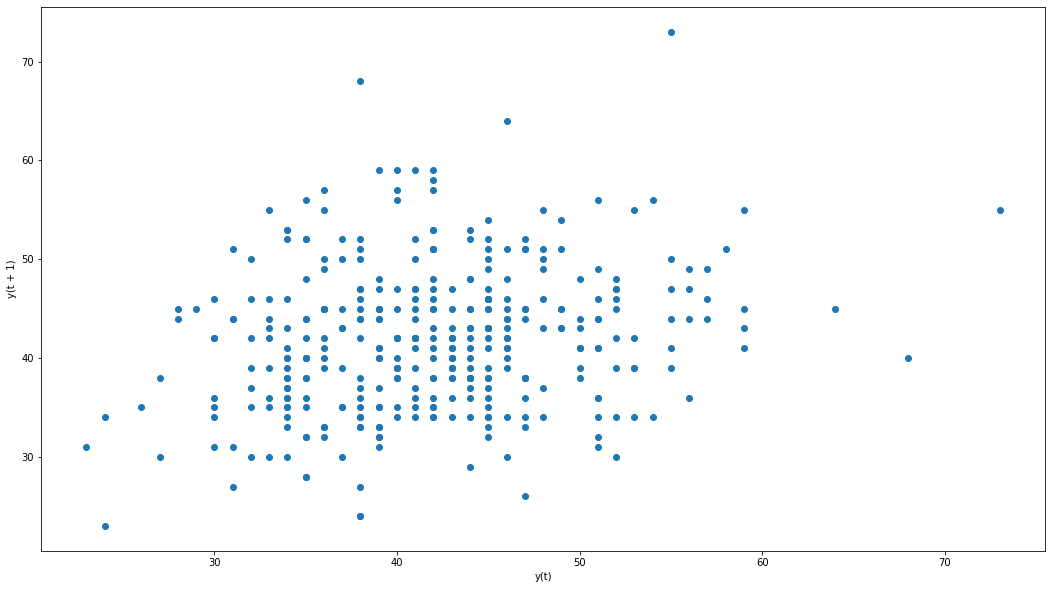

In [ ]:
#NO correlation
plt.figure(figsize=(18,10))
lag_plot(df3['Births']);

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf,pacf

In [ ]:
# Let's look first at the ACF array. By default acf() returns 40 lags
acf(df3['Births'])

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825,  0.0650489 ,  0.11466565,  0.1552232 ,  0.12850638,
        0.10358981,  0.09734643,  0.04912286,  0.04022798,  0.05838555,
        0.05359812,  0.10151053,  0.08268663,  0.0912185 ,  0.11192192,
        0.05652846])

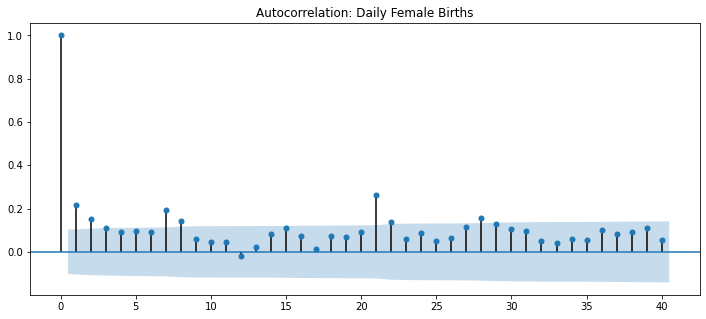

In [ ]:
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation: Daily Female Births'
lags = 40
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(df3,title=title,lags=lags,ax=ax);

In [ ]:
acf(df['Thousands of Passengers'])

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

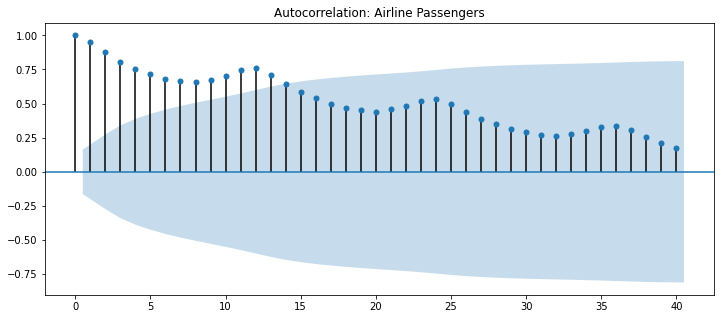

In [ ]:
title = 'Autocorrelation: Airline Passengers'
lags = 40

fig, ax = plt.subplots(figsize=(12,5))
plot_acf(df,title=title,lags=lags,ax=ax);

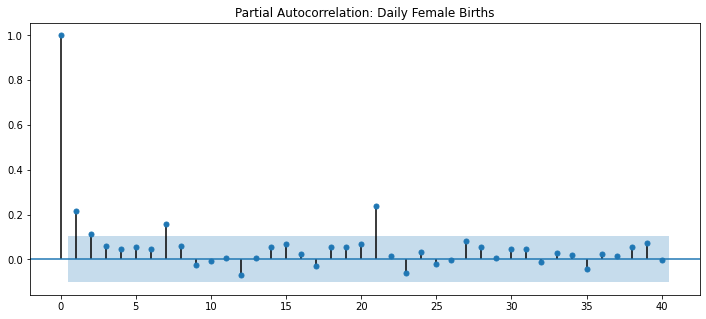

In [ ]:
#PACF gives the partial correlation of a stationary time series with its own lagged values

title='Partial Autocorrelation: Daily Female Births'
lags=40

fig, ax = plt.subplots(figsize=(12,5))
plot_pacf(df2,title=title,lags=lags,ax=ax);

# Differencing
## First Order Differencing
Non-stationary data can be made to look stationary through <em>differencing</em>. A simple method called <em>first order differencing</em> calculates the difference between consecutive observations.

&nbsp;&nbsp;&nbsp;&nbsp;$y^{\prime}_t = y_t - y_{t-1}$

In this way a linear trend is transformed into a horizontal set of values.


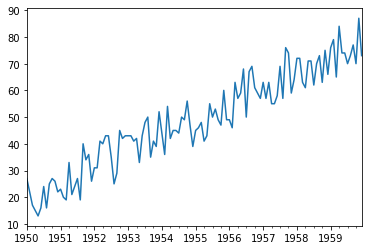

In [ ]:
df2.b.plot()

In [ ]:
# Calculate the first difference of the non-stationary dataset "b"
df2['d1b'] = df2['b'] - df2['b'].shift(1)

df2[['b','d1b']].head()

,b,d1b
1950-01-01,27,NaN
1950-02-01,22,-5.0
1950-03-01,17,-5.0
1950-04-01,15,-2.0
1950-05-01,13,-2.0


Notice that differencing eliminates one or more rows of data from the beginning of the series.

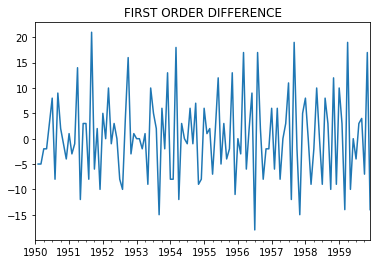

In [ ]:
df2['d1b'].plot(title="FIRST ORDER DIFFERENCE");

An easier way to perform differencing on a pandas Series or DataFrame is to use the built-in <tt>.diff()</tt> method:

In [ ]:
from statsmodels.tsa.statespace.tools import diff

diff(df2['b'],k_diff=1)

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 119, dtype: float64

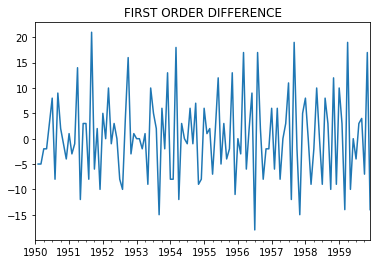

In [ ]:
df2['d1b'] = df2['b'].diff()

df2['d1b'].plot(title="FIRST ORDER DIFFERENCE");

### Forecasting on first order differenced data
When forecasting with first order differences, the predicted values have to be added back in to the original values in order to obtain an appropriate forecast.

Let's say that the next five forecasted values after applying some model to <tt>df['d1b']</tt> are <tt>[7,-2,5,-1,12]</tt>. We need to perform an <em>inverse transformation</em> to obtain values in the scale of the original time series.

In [ ]:
# For our example we need to build a forecast series from scratch
# First determine the most recent date in the training set, to know where the forecast set should start
df2[['b']].tail(3)

,b
1959-10-01,70
1959-11-01,87
1959-12-01,73


In [ ]:
# Next set a DateTime index for the forecast set that extends 5 periods into the future
idx = pd.date_range('1960-01-01', periods=5, freq='MS')
z = pd.DataFrame([7,-2,5,-1,12],index=idx,columns=['Fcast'])
z

,Fcast
1960-01-01,7
1960-02-01,-2
1960-03-01,5
1960-04-01,-1
1960-05-01,12


The idea behind an inverse transformation is to start with the most recent value from the training set, and to add a cumulative sum of Fcast values to build the new forecast set. For this we'll use the pandas <tt>.cumsum()</tt> function which does the reverse of <tt>.diff()</tt>

In [ ]:
# inverse transformation
z['forecast']=df2['b'].iloc[-1] + z['Fcast'].cumsum()
z

,Fcast,forecast
1960-01-01,7,80
1960-02-01,-2,78
1960-03-01,5,83
1960-04-01,-1,82
1960-05-01,12,94


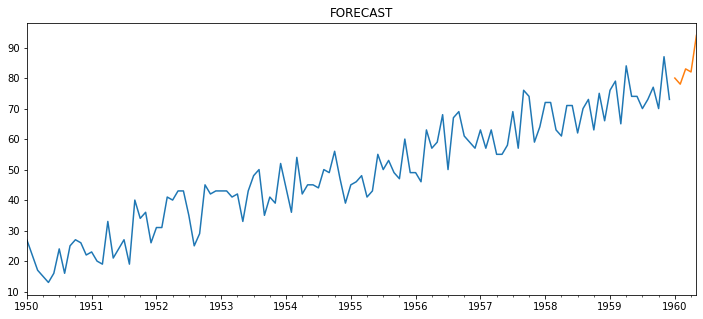

In [ ]:
df2['b'].plot(figsize=(12,5), title="FORECAST")

z['forecast'].plot();

## Second order differencing
Sometimes the first difference is not enough to attain stationarity, particularly if the trend is not linear. We can difference the already differenced values again to obtain a second order set of values.

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{split}y_{t}^{\prime\prime} &= y_{t}^{\prime} - y_{t-1}^{\prime} \\
&= (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) \\
&= y_t - 2y_{t-1} + y_{t-2}\end{split}$

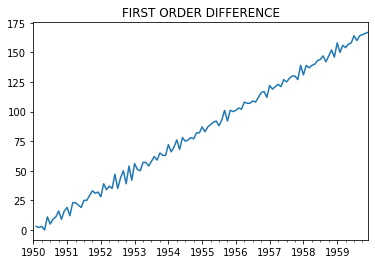

In [ ]:
# First we'll look at the first order difference of dataset "c"
df2['d1c'] = df2['c'].diff()

df2['d1c'].plot(title="FIRST ORDER DIFFERENCE");

Now let's apply a second order difference to dataset "c".

In [ ]:
# We can do this from the original time series in one step
df2['d2c'] = df2['c'].diff().diff()

df2[['c','d1c','d2c']].head()

,c,d1c,d2c
1950-01-01,0,NaN,NaN
1950-02-01,3,3.0,NaN
1950-03-01,5,2.0,-1.0
1950-04-01,8,3.0,1.0
1950-05-01,8,0.0,-3.0


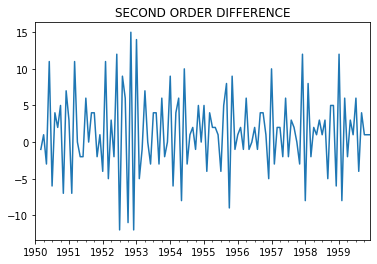

In [ ]:
df2['d2c'].plot(title="SECOND ORDER DIFFERENCE");

<div class="alert alert-info"><strong>NOTE: </strong>This is different from <font color=black><tt>df2['c'].diff(2)</tt></font>, which would provide a first order difference spaced 2 lags apart.<br>
We'll use this technique later to address seasonality.</div>

### Forecasting on second order differenced data
As before, the prediction values have to be added back in to obtain an appropriate forecast.

To invert the second order transformation and obtain forecasted values for $\hat y_t$ we have to solve the second order equation for $y_t$:

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{split}y_{t}^{\prime\prime} &= y_t - 2y_{t-1} + y_{t-2} \\
y_t &= y_{t}^{\prime\prime} + 2y_{t-1} - y_{t-2}\end{split}$

Let's say that the next five forecasted values after applying some model to <tt>df['d2c']</tt> are <tt>[7,-2,5,-1,12]</tt>.

In [ ]:
# For our example we need to build a forecast series from scratch
idx = pd.date_range('1960-01-01', periods=5, freq='MS')
z = pd.DataFrame([7,-2,5,-1,12],index=idx,columns=['Fcast'])
z

,Fcast
1960-01-01,7
1960-02-01,-2
1960-03-01,5
1960-04-01,-1
1960-05-01,12


One way to invert a 2nd order transformation is to follow the formula above:

In [ ]:
forecast = []

# Capture the two most recent values from the training set
v2,v1 = df2['c'].iloc[-2:]

# Apply the formula
for i in z['Fcast']:
    newval = i + 2*v1 - v2
    forecast.append(newval)
    v2,v1 = v1,newval

z['forecast']=forecast
z

,Fcast,forecast
1960-01-01,7,10174
1960-02-01,-2,10346
1960-03-01,5,10523
1960-04-01,-1,10699
1960-05-01,12,10887


Another, perhaps more straightforward method is to create a first difference set from the second, then build the forecast set from the first difference. We'll again use the pandas <tt>.cumsum()</tt> function which does the reverse of <tt>.diff()</tt>

In [ ]:
# Add the most recent first difference from the training set to the Fcast cumulative sum
z['firstdiff'] = (df2['c'].iloc[-1]-df2['c'].iloc[-2]) + z['Fcast'].cumsum()

# Now build the forecast values from the first difference set
z['forecast'] = df2['c'].iloc[-1] + z['firstdiff'].cumsum()

z[['Fcast','firstdiff','forecast']]

,Fcast,firstdiff,forecast
1960-01-01,7,174,10174
1960-02-01,-2,172,10346
1960-03-01,5,177,10523
1960-04-01,-1,176,10699
1960-05-01,12,188,10887


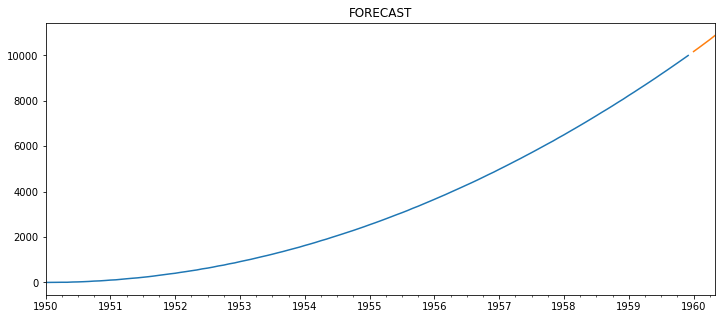

In [ ]:
df2['c'].plot(figsize=(12,5), title="FORECAST").autoscale(axis='x',tight=True)

z['forecast'].plot();

<div class="alert alert-danger"><strong>NOTE:</strong> statsmodels has a built-in differencing tool:<br>
    
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;from statsmodels.tsa.statespace.tools import diff<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;df2['d1'] = diff(df2['b'],k_diff=1)</font></tt><br><br>
    
that performs the same first order differencing operation shown above. We chose not to use it here because seasonal differencing is somewhat complicated. To difference based on 12 lags, the code would be<br><br>

<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;df2['d12'] = diff(df2['b'],k_diff=0,k_seasonal_diff=1,seasonal_periods=12)
</font></tt><br><br>

whereas with pandas it's simply<br><br>

<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;df2['d12'] = df2['b'].diff(12)
</font></tt>
</div>

# Introduction to ARIMA Models

##While exponential smoothing models are based on a description of the trend and seasonality in the data, ARIMA models aim to describe the autocorrelations in the data.

Before we introduce ARIMA models, we must first discuss the concept of stationarity and the technique of differencing time series.

We'll investigate a variety of different forecasting models in upcoming sections, but they all stem from ARIMA.

<strong>ARIMA</strong>, or <em>Autoregressive Integrated Moving Average</em> is actually a combination of 3 models:
* <strong>AR(p)</strong> Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period
* <strong>I(d)</strong> Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
* <strong>MA(q)</strong> Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

<strong>Moving Averages</strong> we've already seen with EWMA and the Holt-Winters Method.<br>
<strong>Integration</strong> will apply differencing to make a time series stationary, which ARIMA requires.<br>
<strong>Autoregression</strong> We're going to correlate a current time series with a lagged version of the same series.<br>
Once we understand the components, we'll investigate how to best choose the $p$, $d$ and $q$ values required by the model.